In [92]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [93]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # The data used for this project is from the Fashion MNIST dataset

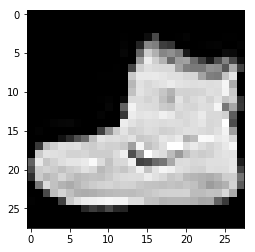

In [94]:
plt.imshow(X_train[0], cmap = 'gray')

In [95]:
X_train.shape

(60000, 28, 28)

In [96]:
X_test.shape

(10000, 28, 28)

In [97]:
y_train.shape

(60000,)

In [98]:
y_test.shape

(10000,)

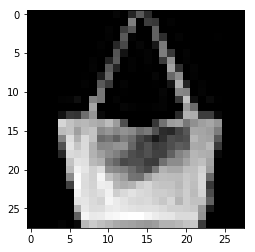

In [99]:
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap = 'gray')

In [100]:
label = y_train[i]
label

8

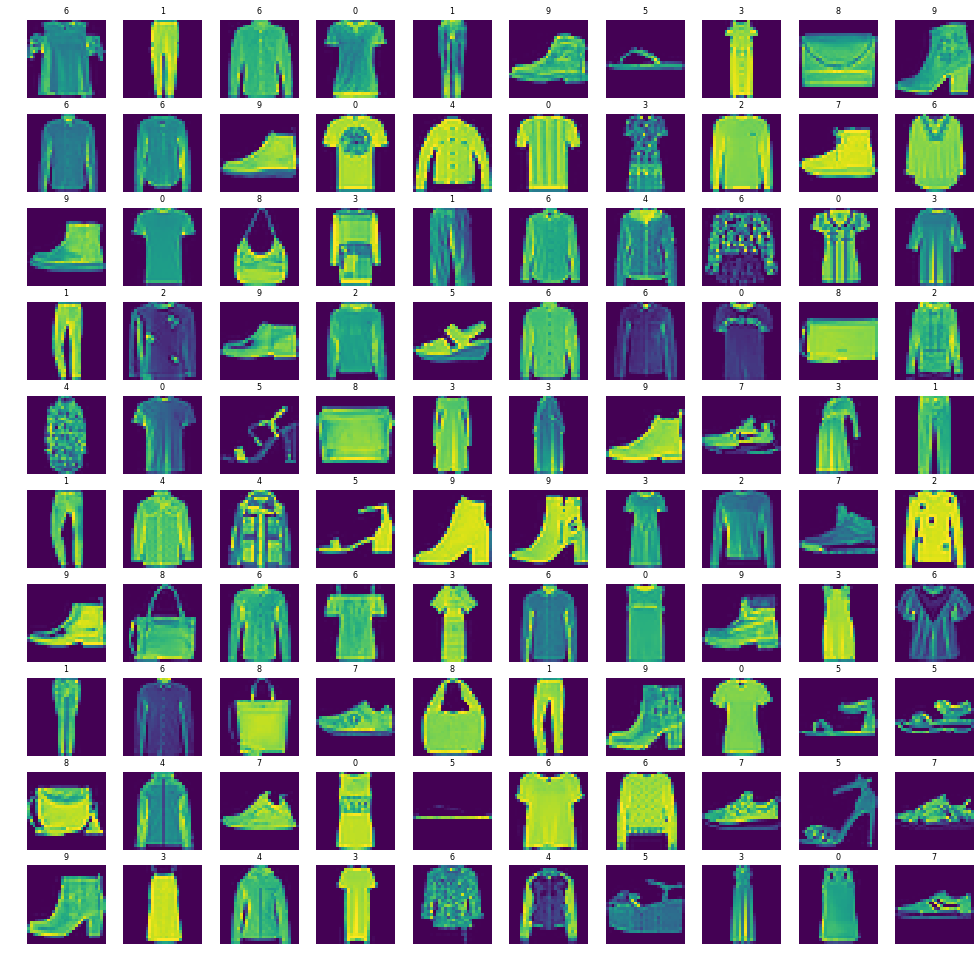

In [101]:
W_grid = 10
L_grid = 10
fig,axes = plt.subplots(W_grid,L_grid,figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

In [102]:
X_train = X_train/255
X_test = X_test/255

In [103]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [104]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [105]:
noise_factor = 0.3
noise_dataset = []
for img in X_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [106]:
noise_dataset = np.array(noise_dataset)

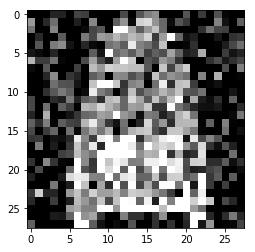

In [107]:
plt.imshow(noise_dataset[22], cmap = 'gray')

In [108]:
noise_factor = 0.1
noise_test_dataset = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [109]:
noise_test_dataset = np.array(noise_test_dataset)

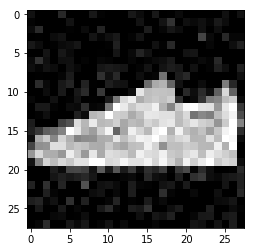

In [110]:
plt.imshow(noise_test_dataset[22], cmap = 'gray')

In [114]:
#encoder 
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2,padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#decoder 
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))



In [115]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [116]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size = 200,
                validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28,1)))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 18s 304us/sample - loss: 80.0638 - val_loss: 63.2621
Epoch 2/10
60000/60000 [==============================] - 16s 271us/sample - loss: 63.2729 - val_loss: 60.8185
Epoch 3/10
60000/60000 [==============================] - 16s 275us/sample - loss: 61.9018 - val_loss: 59.6137
Epoch 4/10
60000/60000 [==============================] - 17s 276us/sample - loss: 61.2368 - val_loss: 58.8901
Epoch 5/10
60000/60000 [==============================] - 17s 281us/sample - loss: 60.9467 - val_loss: 58.6561
Epoch 6/10
60000/60000 [==============================] - 17s 277us/sample - loss: 60.7703 - val_loss: 58.6105
Epoch 7/10
60000/60000 [==============================] - 17s 278us/sample - loss: 60.6326 - val_loss: 58.3263
Epoch 8/10
60000/60000 [==============================] - 17s 278us/sample - loss: 60.5166 - val_loss: 58.3554
Epoch 9/10
600

In [118]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28,1))
print('Test loss: {:.3f}'.format(evaluation))

10000/10000 [==============================] - 2s 167us/sample - loss: 9.2555
Test loss: 9.255


In [120]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

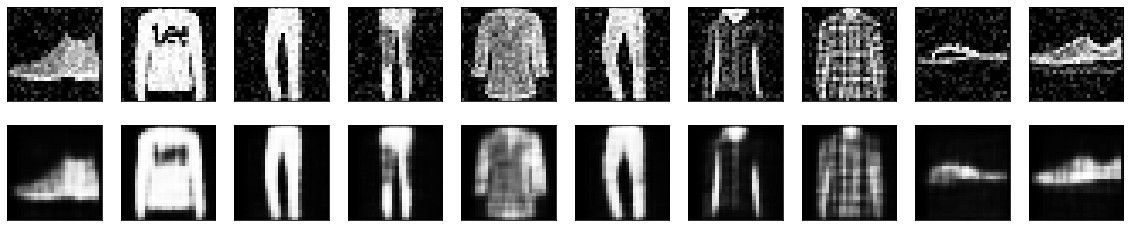

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images,row in zip([noise_test_dataset[:10], predicted], axes):
    for img,ax in zip(images,row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

0= Tshirt/top

1= Trouser

2= Pullover

3= Dress

4= Coat

5= Sandal

6= Shirt

7= Sneaker

8= Bag

9= Anke boot